In [803]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [804]:
import warnings 
warnings.filterwarnings('ignore')


In [805]:
#loading the loan prediction data
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [806]:
# Making a copy of the test and train datasets so that even if I make changes in the data it will not alter the original datasets
train_original = train.copy()
test_original = test.copy()

In [807]:
#Checking the features present in the datasets for train data
train. columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [808]:
# checking the features present in the test datasets
test.columns
# both test and train datasets features are the same except for the loan_status. we will predict the loan status using the model built 
# using the train data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [809]:
#print datatypes for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [810]:
#shape of the datasets
train.shape, test.shape

((614, 13), (367, 12))

In [811]:
# we have 614 rows and 13 columns in the train datasets
# we have 367 rows and 12 columns in the test datasets

In [812]:
#doing the univariate analysis i.e examine each variable individually
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [813]:
#setting normalize to true to print proportions instead of numbers
train['Loan_Status'].value_counts(normalize = True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

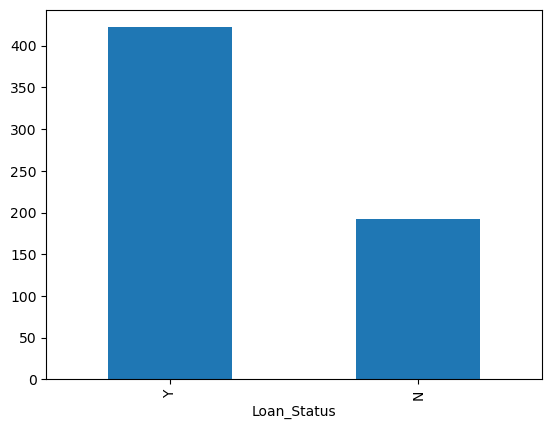

In [814]:
train['Loan_Status'].value_counts().plot.bar()
# The loan of 422 people out of 614 was approved.

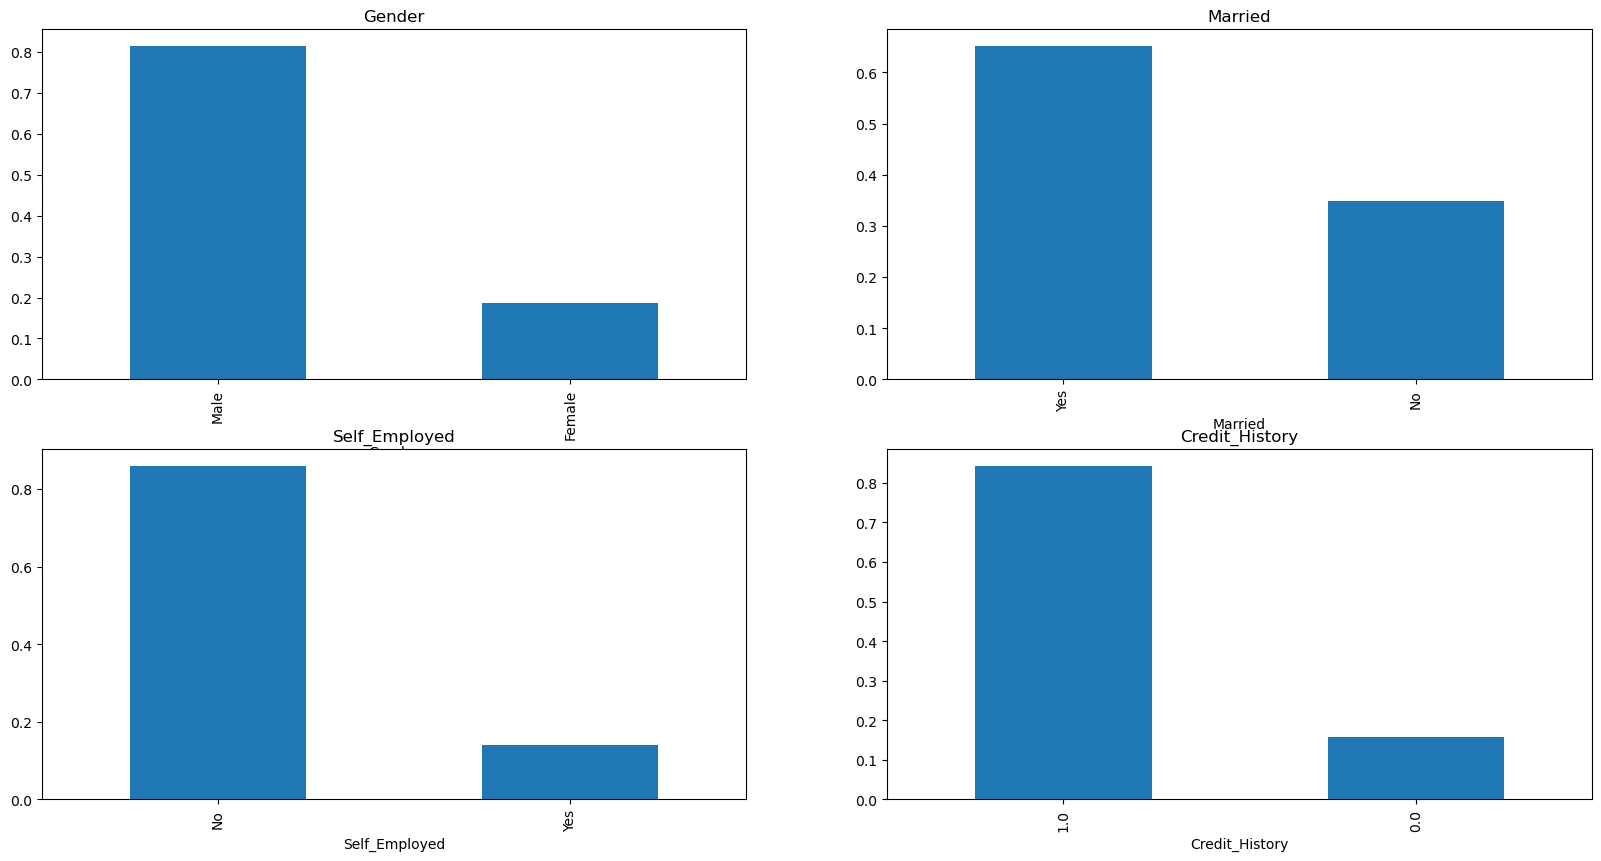

In [815]:
#visualizing the Categorical feature : features that have category e.g(married, gender, self_employed,  credit_history, Loan_status)

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar (figsize = (20,10), title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')
plt.show()

In [816]:
#it can be inferred from the above plot that:
# 80% of applicants of the datasets are male
#Around 65% of the datasets are married
# Around 15% of applicants of the datasets are self-employed
# Around 85% of applicants have repaid their debt.


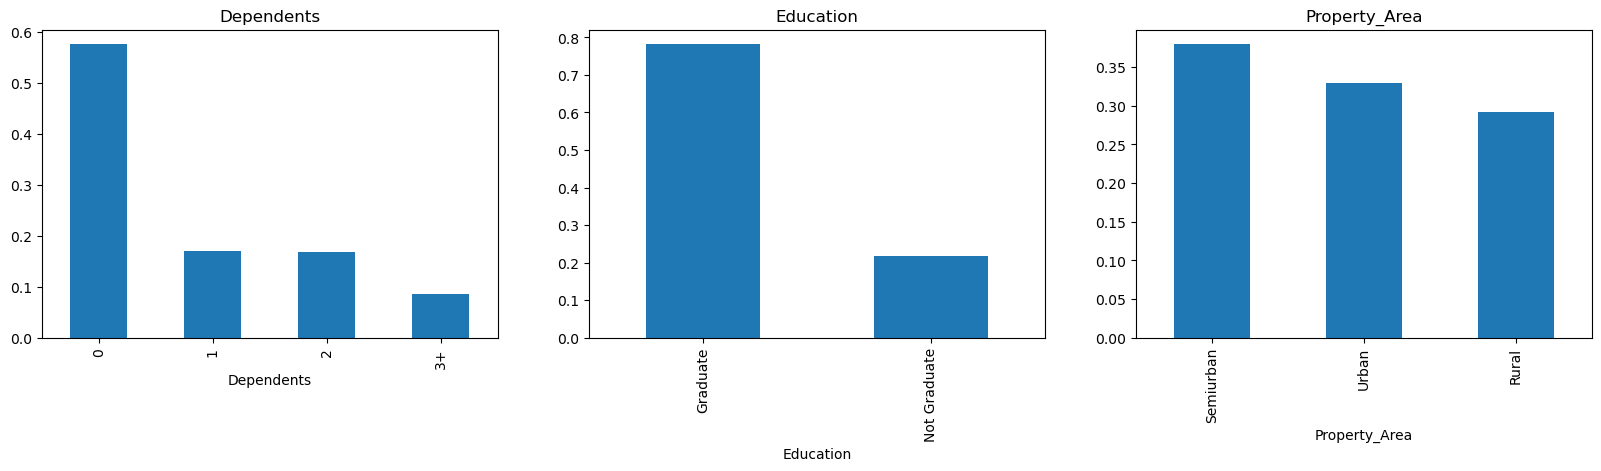

In [817]:
# visualizing the ordinal features

plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (20,4), title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()

In [818]:
#inferences from the above plots:
# Most of the applicants do not have any dependents
# Around 80% of the applicants are graduate
# Most of the applicants are from semi-urban areas.


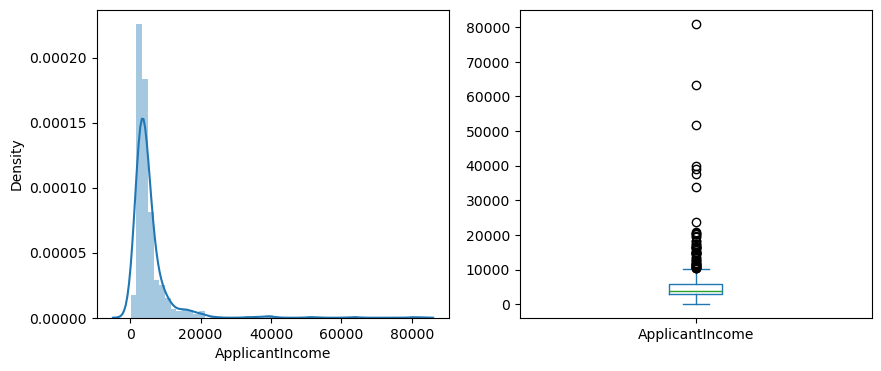

In [819]:
#visualizing the numerical variable: features that have numerical variables
#looking at the distribution of applicant's income first
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (10,4))
plt.show()


In [820]:
# the above data schows that most of the data in the distribution of applicant income is toward left
# which means it is not normally distributed
# the boxplots confirms the presence of a lot of outliers/extreme values, this can be attributed in the income disparity in the society
#part of this can be driven by the fact that we are looking at people with different education levels. 


Text(0.5, 0.98, ' ')

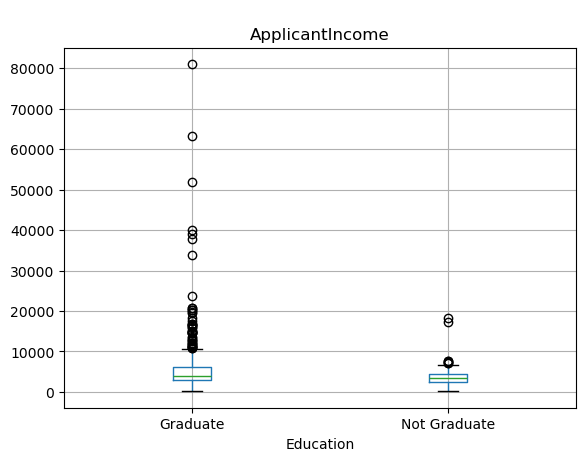

In [821]:
#segregating them by education
train.boxplot(column = 'ApplicantIncome', by = 'Education') 
plt.suptitle(" ")

In [822]:
# from the above, we can see that there are higher number of graduate with very high income, which are appearing to be outliers

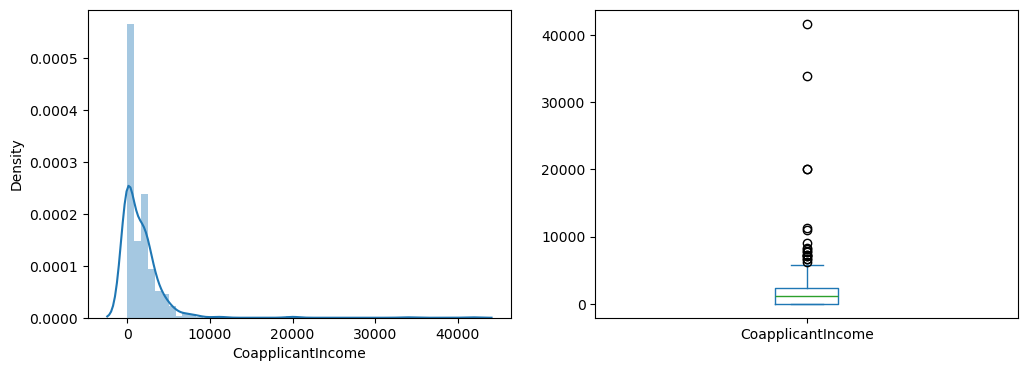

In [823]:
# Looking at the coapplicant income distribution

plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train ['CoapplicantIncome'].plot.box (figsize = (12,4))
plt.show()

In [824]:
#majority of the coapplicant income ranges from 0 to 5000
#we also see a lot of outliers in the coapplicant income and it is not normally distributed.

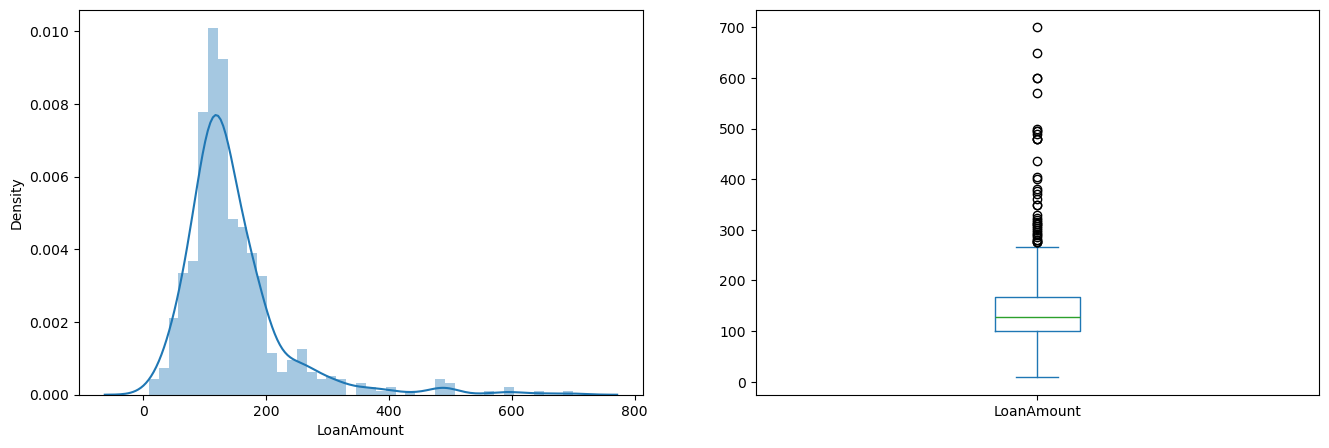

In [825]:
#Distribution of loan variable
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (16,5))
plt.show()

In [826]:
# in the plots above, there are a lot of outliers in the variable and the distribution is Fairly normal

In [827]:
#Hypothesis:
# Applicants with high income should have more chances of loan approval
# Applicants who have repaid their previous debt should have higher chances of loan approval
# loan Approval should also depend on the loan amount. if the loan amount is less, chances of loan approval should be high.
# lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [828]:
# Finding the proportion of the approved and unapproved loan.

<Axes: xlabel='Gender'>

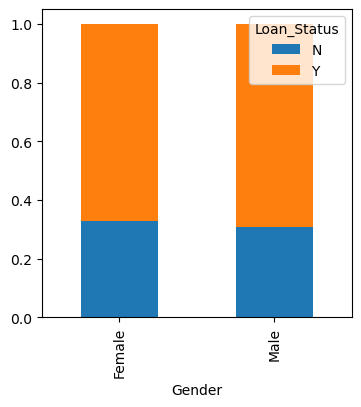

In [829]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [830]:
# in the above plot, the proportion of male and female applicant is more or less same for both approved and unapproved loans.

In [831]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Self_Employed'>

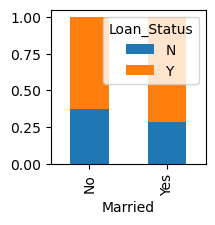

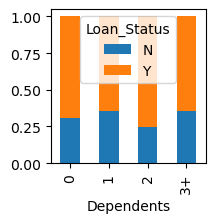

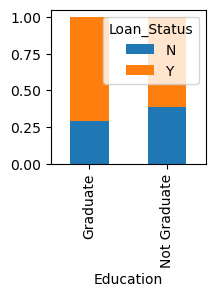

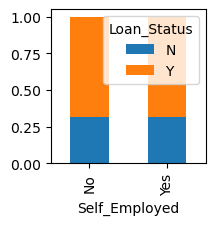

In [832]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True, figsize = (2,2) )
Dependents.div(Dependents.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True, figsize = (2,2))
Education.div(Education.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True, figsize = (2,2))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, figsize = (2,2))


In [833]:
# proportion of marriage applicant is higher for the approved loans
# ditribution of applicants with 1 or 3+ dependents is similar across both categories of loan status
# there is nothing significant we can infer from self employed versus loan status

In [834]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Property_Area'>

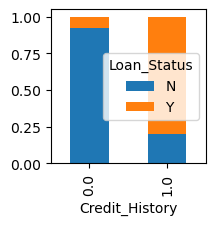

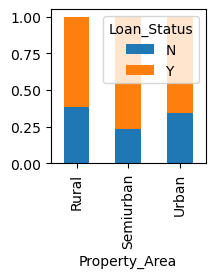

In [835]:
Credit_History= pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True, figsize = (2,2))
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True,figsize = (2,2))

In [836]:
# people with credit history below 1 are less likely to get their loans approved while,
#people with credit history of 1 are more likely to get their loan approaved.
#proportions of loans getting approaved is higher in semiurban area as compared to the rural and urban area 

<Axes: xlabel='Loan_Status'>

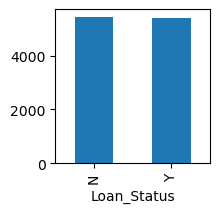

In [837]:
# finding the mean income of people in which the loans has been approved 
#vs
# the mean income of people for which the loans has not been approved

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(figsize=(2,2))



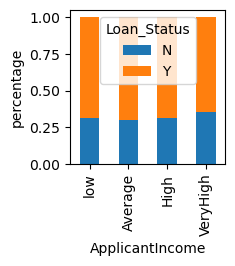

In [838]:
#the y-axis represent the mean Applicant income and there is no change in the mean income.

bins = [0,2500,4000,6000,8100] 
group = ['low','Average','High','VeryHigh']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins, labels = group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize=(2,2))
plt.xlabel('ApplicantIncome') 
p = plt.ylabel('percentage')

In [839]:
#it can be inferred that applicant income does not affect the chances of loan approval which contradicts our hypothesis 
# in which we assumed that if the applicant's income is high, the chances of loan approval will also be high

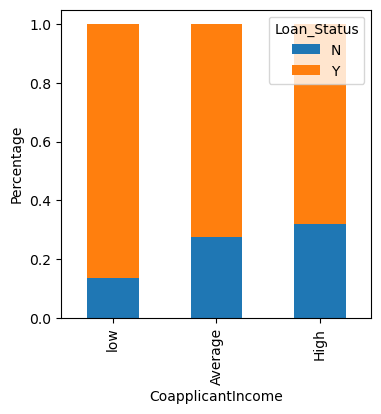

In [840]:
# We will analyze the co-applicant income and loan amount variable similarly.

bins = [0,1000,3000,4200] 
group = ['low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins, labels = group)
Coapplicant_income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_income_bin.div(Coapplicant_income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4)) 
plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')
plt.show()

In [841]:
# The above graph shows that if co-applicant income is low, the chances of loan approval are high. but this does not look right
# The possible reason behind this may be that most of the applicants don't have co-applicants so the co-applicant income for such applicants is 0
#and hence, the loan approval is not dependent on it. so we can make a new variable in which we will combine the applicants and coapplicants income
#to visualize the combined effect of income on loan approval.

Text(0, 0.5, 'Percentage')

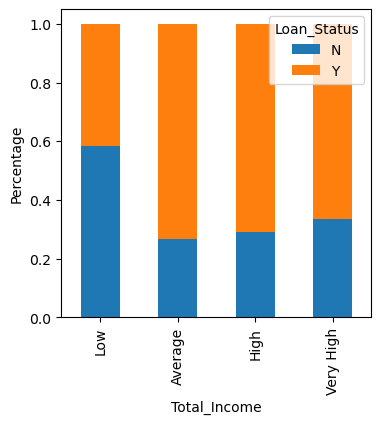

In [842]:
# combining the coapplicant income and the applicant income and seeinf the combined effect of total income on loan status

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,8100]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels = group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True , figsize=(4,4))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

In [843]:
# We can see that the proportion of loans getting approved for applicants having low Total_income is much less compared to that
# of applicants with Average, High, Very High income.

Text(0, 0.5, 'Percentage')

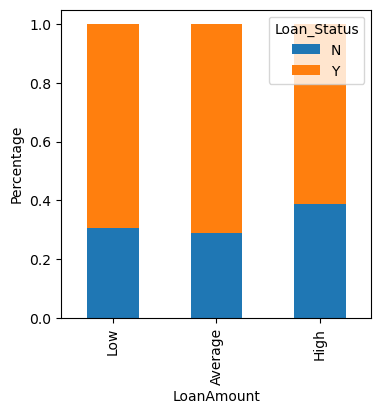

In [844]:
#visualizing the loan amount variable

bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins,labels = group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.xlabel ('LoanAmount')
plt.ylabel('Percentage')

In [845]:
# it can be seen that the proportion of approved loans is higher for low and average loan amounts as compared to that of High amount
#, which supports our hypothesis that the loan approval chances will be higher when the loan amount is less.


In [846]:
#dropping the bins I created for the exploratory part.
# Changing the 3+ in the dependent variable to 3 to make it a numerical variable
# Also converting the target variables category into 0 and 1 to find the correlation with numerical variables.
# NOTE: Logistics regression takes only numerical values as input. replacing N with 0 and Y with 1.
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

In [847]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin',
                    'Total_Income_bin', 'Total_Income'], axis = 1, errors = 'ignore')

train['Dependents'].replace('3+', 3, inplace = True )
test['Dependents'].replace('3+', 3, inplace = True)
train['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace = True)

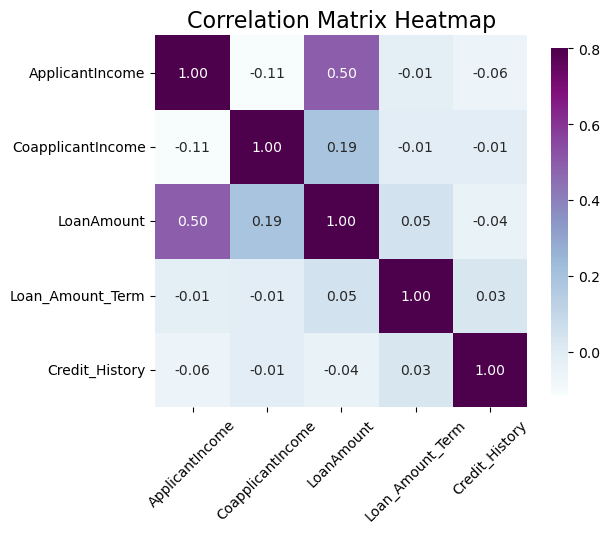

In [848]:
#calculate the correlation matrix
matrix = df.corr(numeric_only = True)
# Set up the matplotlib figure with a size
f, ax = plt.subplots(figsize=(6, 6))
# Create the heatmap with annotations and labels
sns.heatmap(matrix, vmax=0.8, square=True, cmap='BuPu', annot=True, fmt='.2f', cbar_kws={"shrink": .75})
# Add a title and labels for clarity
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)    # Keep y-axis labels horizontal
plt.show()

In [849]:
# we see that most correlated variables are (Applicant income, coapplicant income, loanAmount,loanAmount_Term, CreditHistory)

In [850]:
#missing value inputation
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [851]:
# there are missing values in gen, married, dependents, self_employed,loanamount, loan_amount_term and credit_History.
#fillinf the missing values

train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)



In [852]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [853]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [854]:
# It can be seen that in the loan amount term variable, the value of 360 repeats the most.
# so we will replace the missing values in this variable using the mode of this variable

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace = True)

In [855]:
#to check if the missing values are filled with datasets.
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [856]:
# filling the missing values in test datasets
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [857]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)


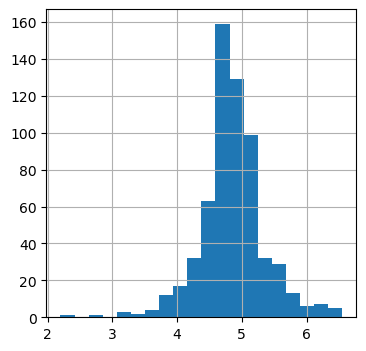

In [858]:
#using log transformation to to normalize or reduce skewness in the data
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20, figsize=(4,4))
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [859]:
# now the distribution looks much closer to normal and effect of extreme values has been significantly subsided


In [860]:
#building a logistc regression model and make prediction for the test datasets

In [861]:
#dropping loan_ID variable as it do not have any effect on loan status
train=train.drop('Loan_ID', axis=1)
test=test.drop('Loan_ID', axis=1)

In [862]:
x= train.drop('Loan_Status', axis=1)
y = train.Loan_Status


In [863]:
#converting categorical variables into a one-hot encoded format
x=pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [864]:
#training the model
x_train,x_cv,y_train, y_cv = train_test_split(x,y,test_size = 0.3)

In [865]:
# Initialize the Logistic Regression model
model = LogisticRegression(C=1, 
                           class_weight=None, 
                           dual=False, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           max_iter=100, 
                           multi_class='ovr', 
                           n_jobs=1, 
                           penalty='l2',  # Should be 'l2' for regularization
                           random_state=1, 
                           solver='liblinear', 
                           tol=0.0001, 
                           verbose=0, 
                           warm_start=False)

# Train the model on the training data
model.fit(x_train, y_train)


LogisticRegression(C=1, multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [866]:
#predicting the loan_Status for validation set and calculating it's accuracy
pred_cv=model.predict(x_cv)

In [867]:
# Calculating how my predictions are by calculating the accuracy
accuracy_score(y_cv, pred_cv)

0.8216216216216217

In [868]:
# If dropping rows with missing values, make sure you apply this to both X_train and y_train
train.dropna(subset=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log'], inplace=True)

# Now check that both X and y have the same number of samples
X_train = train[features]
y_train = train['Loan_Status']  # Assuming 'Loan_Status' is the target

# Features list excluding the original 'Dependents' (which was already one-hot encoded)
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 
            'LoanAmount_log', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
            'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3', 'Education_Graduate', 
            'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
            'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']

# Train the model (assuming you already have your train and test sets ready)
X_train = train[features]
X_test = test[features]

# Model training
model.fit(X_train, y_train)

# Predictions on the test set
pred_test = model.predict(X_test)


In [869]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']


In [870]:
#converting 1 and 0 to Yand N
submission['Loan_Status'].replace(0,'N', inplace = True)
submission['Loan_Status'].replace(1,'Y', inplace = True)


In [871]:
#converting sunmission to .csv format
#pd.dataframe(submission,columns = ['Loan_ID','Loan_Status']) to_csv('logistic.csv')

# Assuming submission is a dictionary or DataFrame with 'Loan_ID' and 'Loan_Status' as keys/columns
# Create a DataFrame from the submission data
submission_df = pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status'])

# Save the DataFrame to a CSV file
submission_df.to_csv('logistic.csv', index=False)  # Set index=False to avoid writing row numbers
